In [110]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr 
%matplotlib inline

df_train = pd.read_csv("training_set_VU_DM_2014_2.csv", index_col=False)
# print(df_train.price_usd.describe())
# print(df_train.price_usd)
df_train.head()

,srch_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,srch_destination_id,srch_adults_count,srch_children_count,srch_room_count,click_bool,gross_bookings_usd,booking_bool
0,1,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,104.77,23246,4,0,1,0,NaN,0
1,1,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,170.74,23246,4,0,1,0,NaN,0
2,1,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,179.80,23246,4,0,1,0,NaN,0
3,1,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,602.77,23246,4,0,1,0,NaN,0
4,1,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,143.58,23246,4,0,1,0,NaN,0


In [111]:
# df_train.info()
# print("----------------------------")

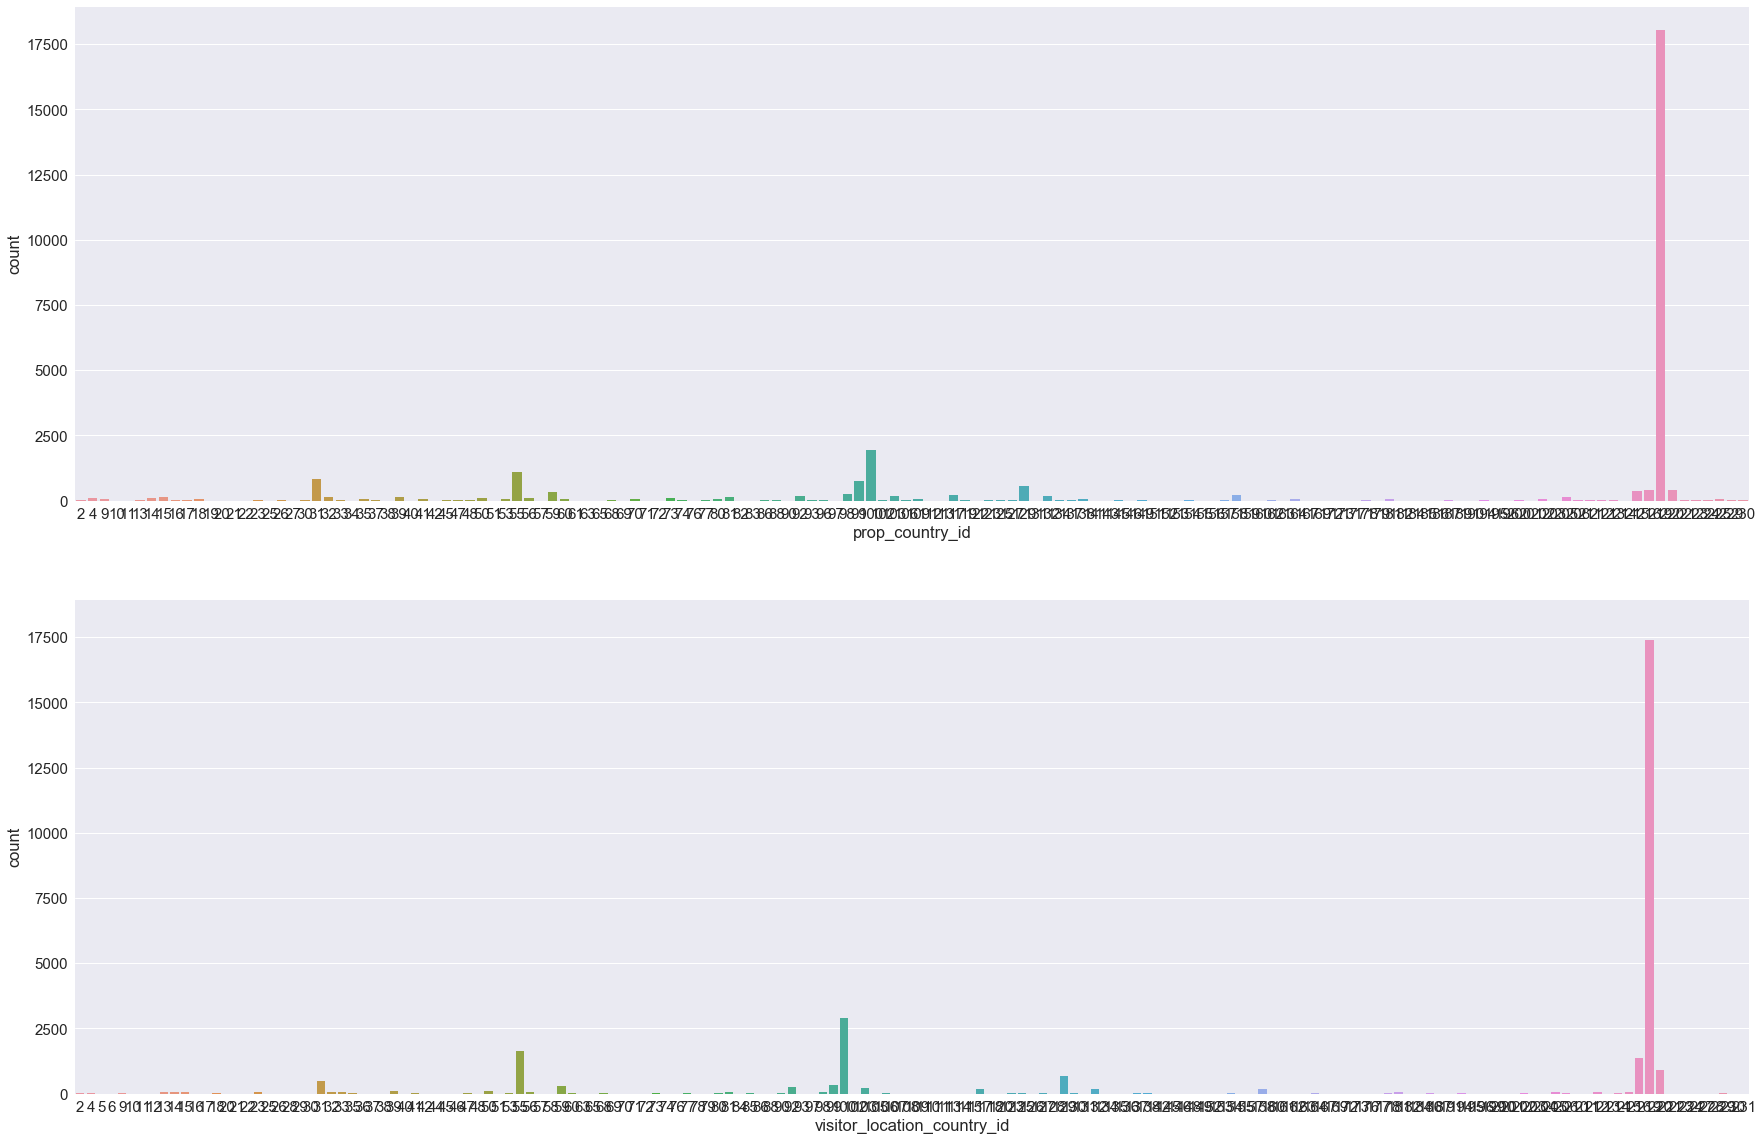

In [112]:
# what are the countries that users travel from most
# what are the countries that users travel to most

#set up axes
f, axes = plt.subplots(2, 1, figsize=(30,20), sharex=False, sharey=True)
sns.set(font_scale=1.5)

# only plot rooms that were actually booked
bookings_df = df_train[df_train["booking_bool"] == 1]

# plot charts onto axes
ax = sns.countplot(x="prop_country_id", data=bookings_df.sort_values("prop_country_id"), ax=axes[0])
ax1 = sns.countplot(x="visitor_location_country_id", data=bookings_df.sort_values("visitor_location_country_id"), ax=axes[1])
plt.savefig('countplots.png')
# ax.set_yscale('log')
# ax1.set_yscale('log')

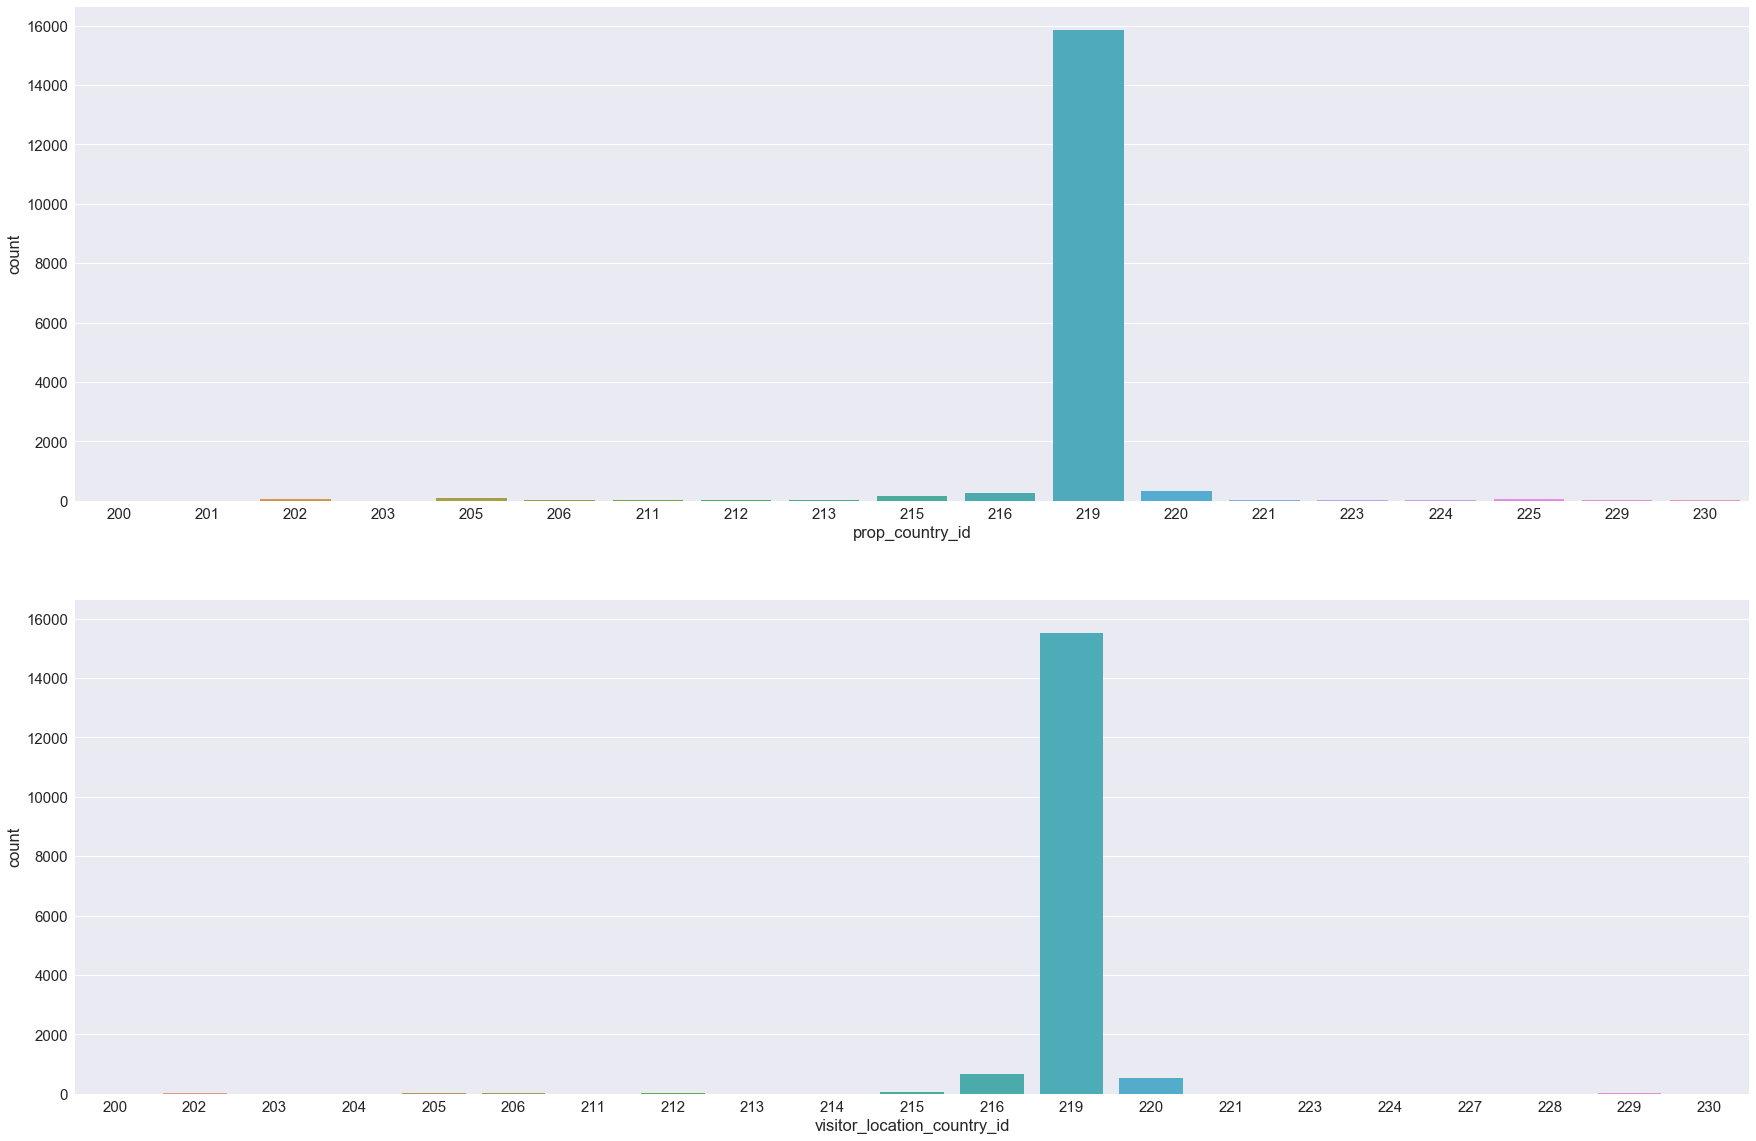

In [113]:
# what are the countries that users travel from most
# what are the countries that users travel to most

#set up axes
f, axes = plt.subplots(2, 1, figsize=(30,20), sharex=False, sharey=True)
sns.set(font_scale=1.5)

# only plot rooms that were booked 
bookings_df = df_train[df_train["booking_bool"] == 1]

#Remove first 200 values of feature for readibility of chart
bookings_df = bookings_df.drop(bookings_df[bookings_df.prop_country_id.astype(float) < 200].index)
bookings_df = bookings_df.drop(bookings_df[bookings_df.visitor_location_country_id.astype(float) < 200].index)

# plot charts onto axes
ax = sns.countplot(x="prop_country_id", data=bookings_df.sort_values("prop_country_id"), ax=axes[0])
ax1 = sns.countplot(x="visitor_location_country_id", data=bookings_df.sort_values("visitor_location_country_id"), ax=axes[1])
plt.savefig('countplots.png')
# ax.set_yscale('log')
# ax1.set_yscale('log')

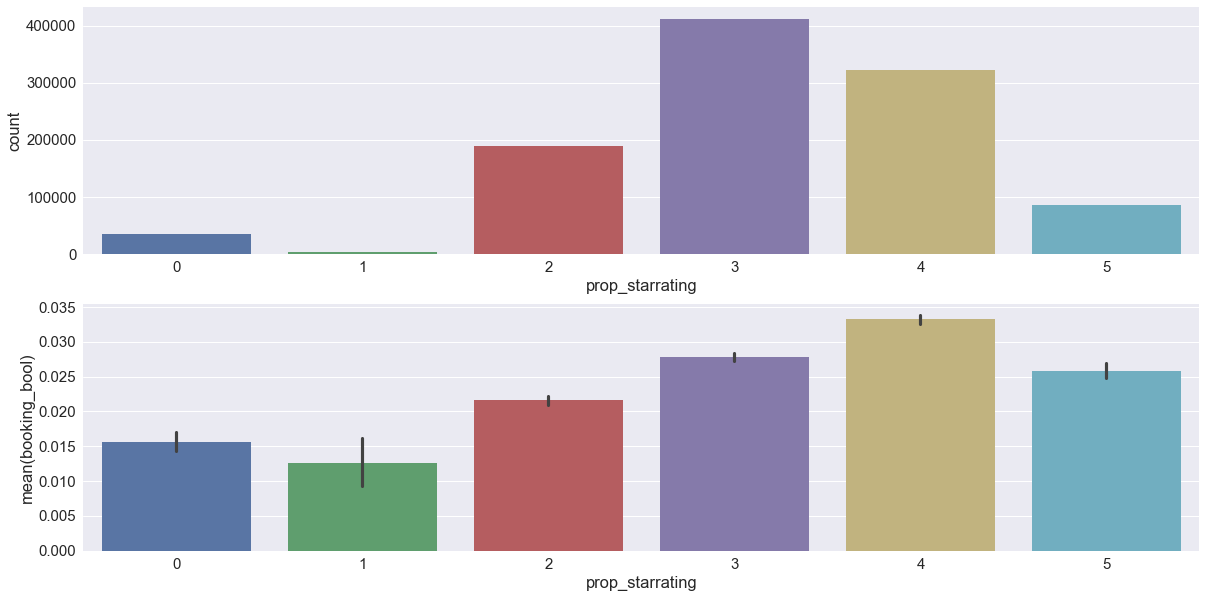

In [125]:

# Does starrating determine booking?

fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(20,10))

sns.set(font_scale=1.5)

sns.countplot(x="prop_starrating", data=df_train, ax=axis1)
g = sns.factorplot(x="prop_starrating", y="booking_bool", data=df_train, kind="bar", ax=axis2)
plt.close(g.fig)

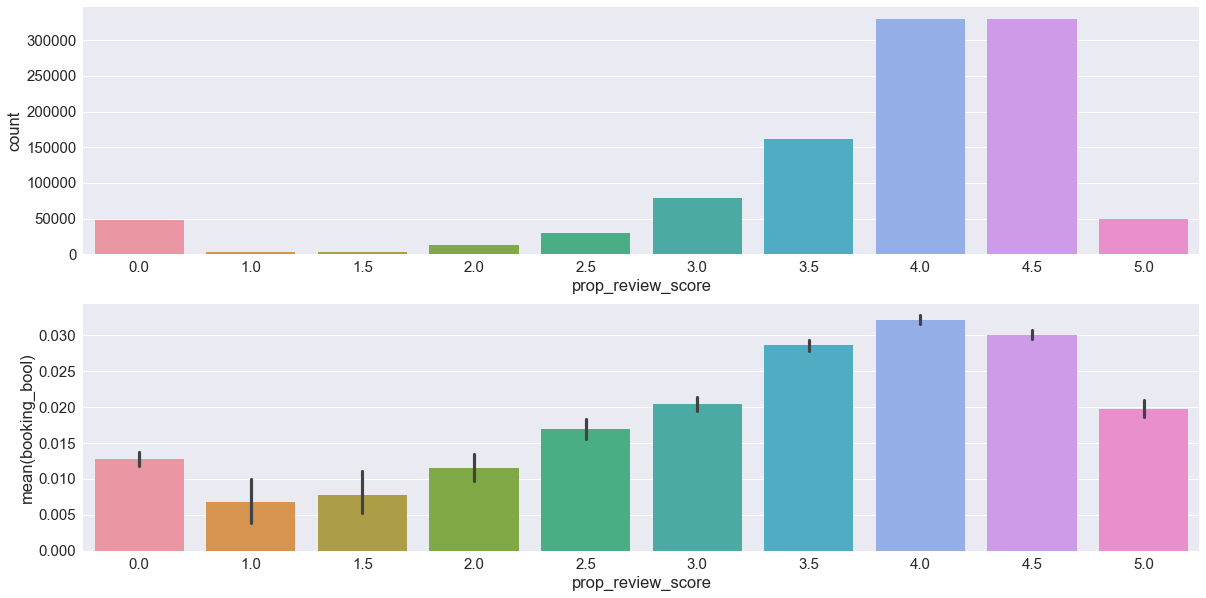

In [126]:
# Does reviewscore determine booking?

fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(20,10))

sns.set(font_scale=1.5)

sns.countplot(x="prop_review_score", data=df_train, ax=axis1)
g = sns.factorplot(x="prop_review_score", y="booking_bool", data=df_train, kind="bar", ax=axis2)
plt.close(g.fig)

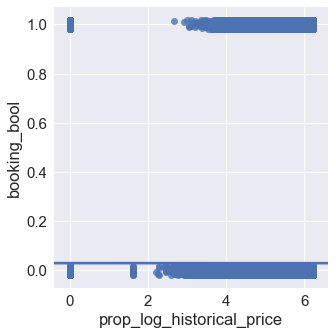

In [116]:
# Show the booking probability as a function of price 
g = sns.lmplot(x="prop_log_historical_price", y="booking_bool", data=df_train, y_jitter=.02, logistic=True, ci=None)

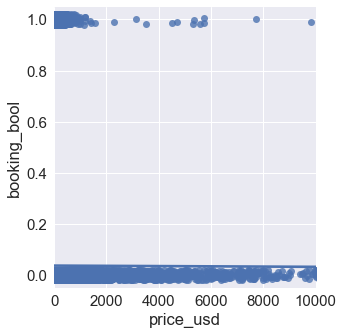

In [117]:
# Show the booking probability as a function of price 
g = sns.lmplot(x="price_usd", y="booking_bool", data=df_train, y_jitter=.02, logistic=True, ci=None)
g.set(xlim=(0, 10000), ylim=(-.05, 1.05))

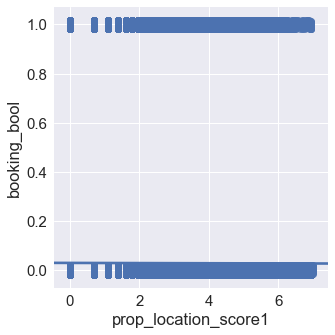

In [118]:
# Show the booking probability as a function of price 
g = sns.lmplot(x="prop_location_score1", y="booking_bool", data=df_train, y_jitter=.02, logistic=True, ci=None)

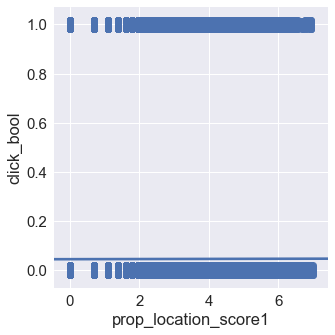

In [119]:
# Show the booking probability as a function of price 
g = sns.lmplot(x="prop_location_score1", y="click_bool", data=df_train, y_jitter=.02, logistic=True, ci=None)

In [120]:
x = df_train['price_usd']
y = df_train['booking_bool']
log = sm.Logit(y, x).fit()
log.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           booking_bool   No. Observations:              1048575
Model:                          Logit   Df Residuals:                  1048574
Method:                           MLE   Df Model:                            0
Date:                Mon, 01 May 2017   Pseudo R-squ.:                    -inf
Time:                        23:48:23   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.3295e+05
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
price_usd     -0.0272   5.04e-05   -540.337      0.000      -0.027      -0.027
==============================================================================
"""

In [121]:
df_train1 = df_train[numpy.isfinite(df['visitor_hist_starrating'])]
x = df_train1['prop_starrating']
y = df_train1['visitor_hist_starrating']
print(numpy.corrcoef(x,y))


[[ 1.          0.28557888]
 [ 0.28557888  1.        ]]


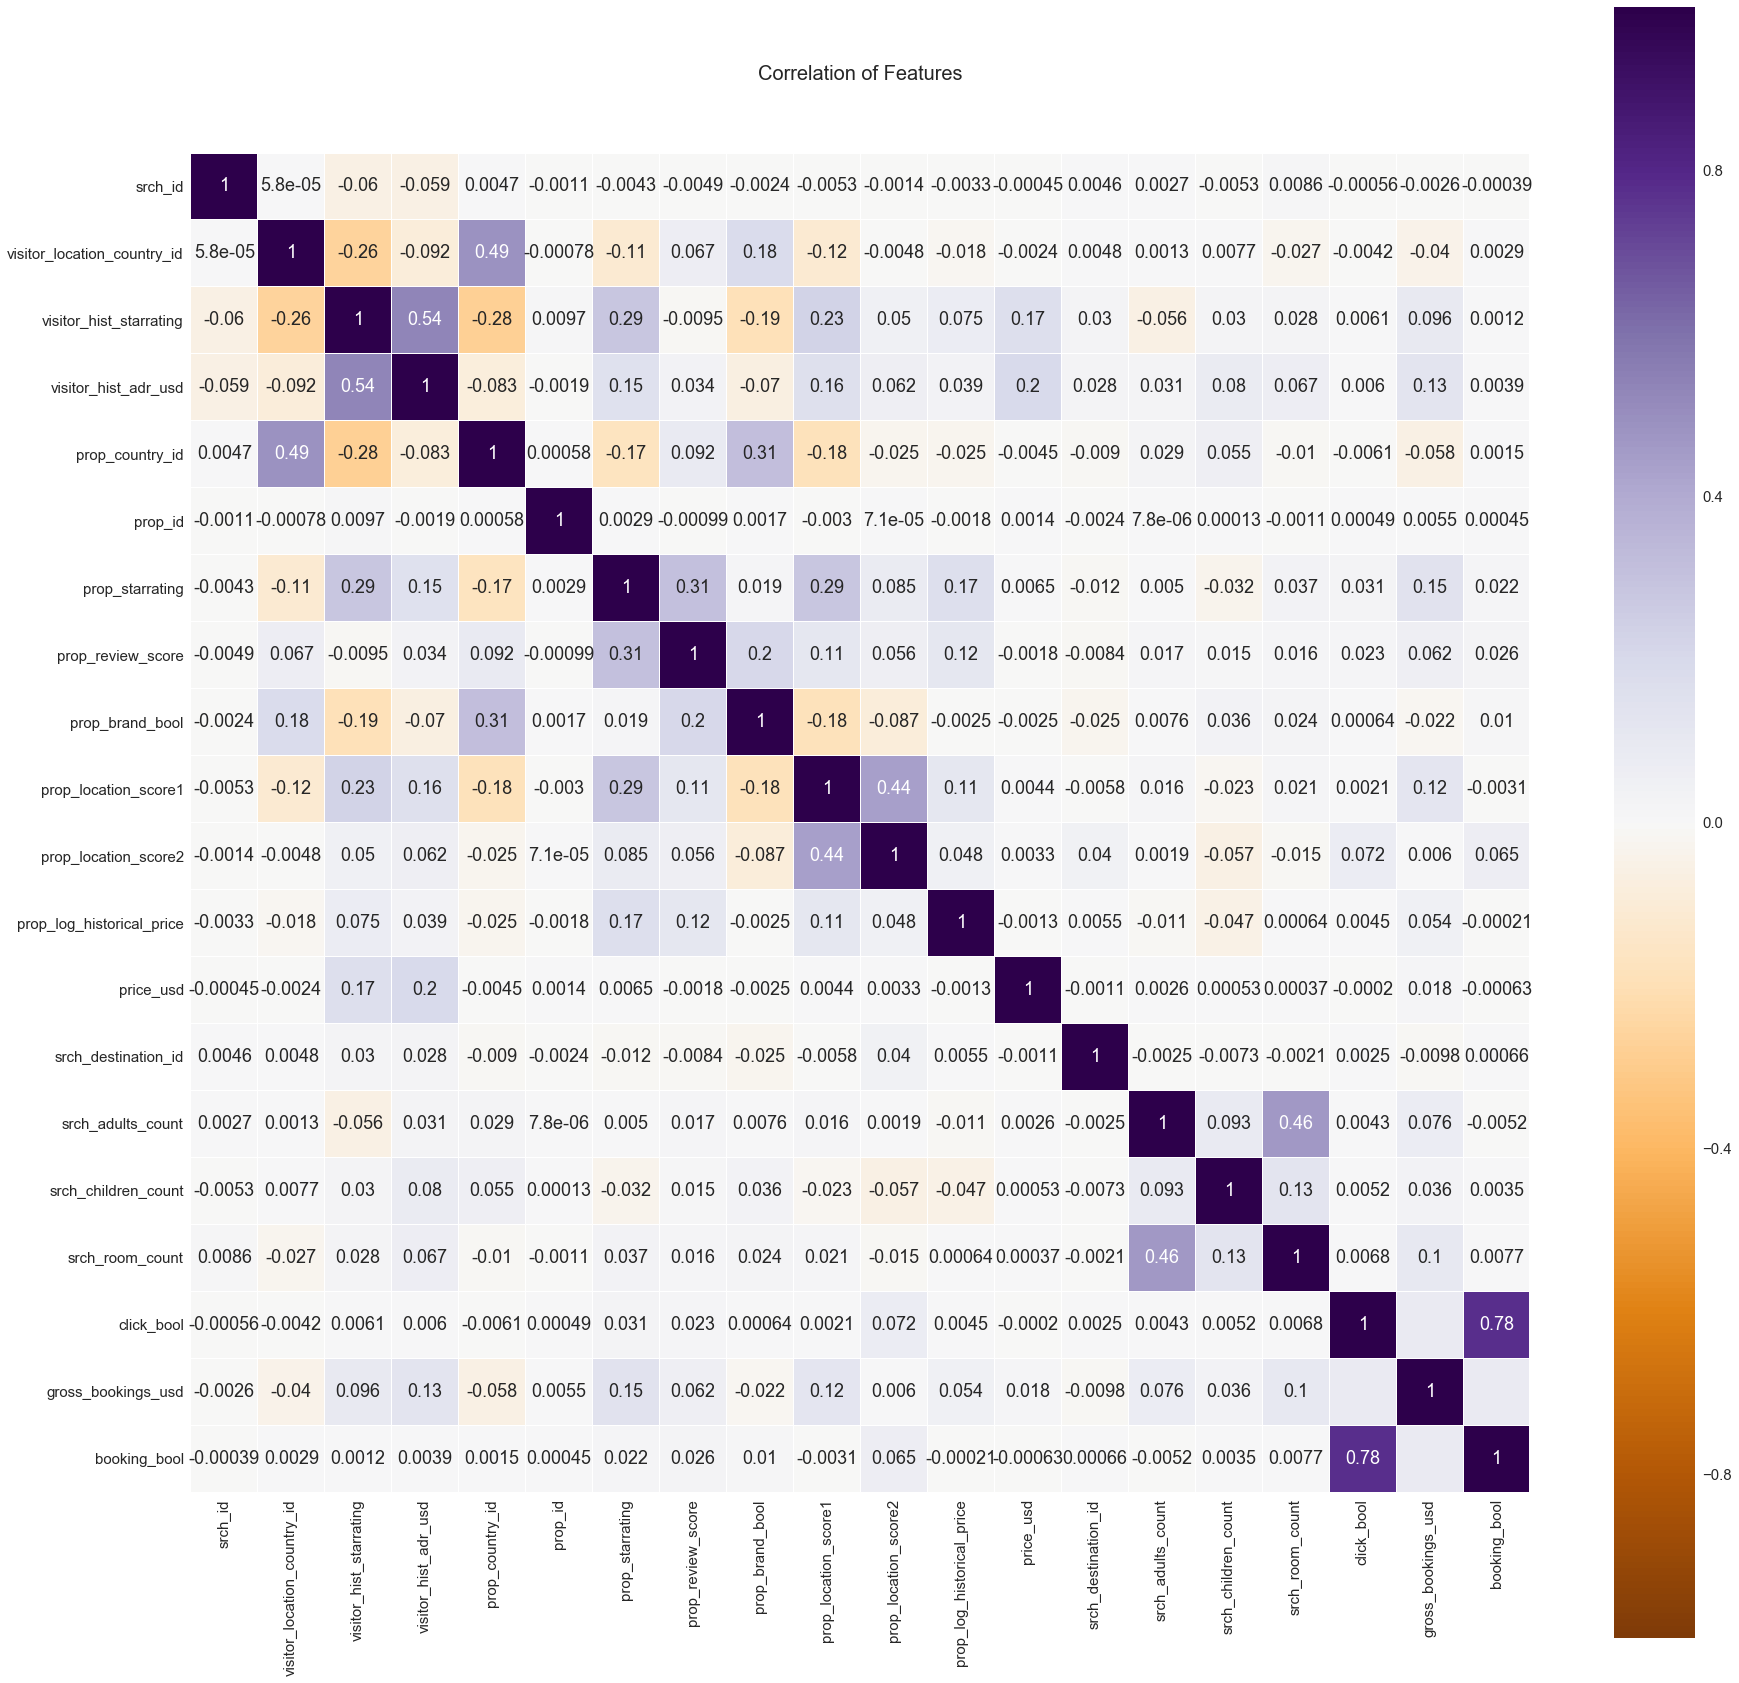

In [124]:
colormap = plt.cm.PuOr
plt.figure(figsize=(30,30))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)